### King County Housing Data Analysis

In [38]:
# Step1. Important Necessary Libraries
# Step 2. Data Loading and Initial Exploration 
# Step 3. Data Preprocessing
# Step 4. Dataset Visualization
# Step 5. Feature engineering

### Step1. Important Necessary Libraries

In [39]:
# Data Manipulation 
import pandas as pd 
import numpy as np

# Data Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Data Cleaning
import klib 


# Feature Scaling and Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Step 2. Data Loading and Initial Exploration 

In [40]:
# Loading the House price dataset 
df = pd.read_csv( r"C:\Users\Maftuna\Desktop\kc_house_data.csv" )

In [41]:
# Display the first 5 rows of the dataset 
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
# Display the last 5 rows
df.tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [43]:
# Get summary statistics of the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [44]:
# Number of rows and columns in the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 21613 rows and 21 columns.


### Step 3.  Data Cleaning and Preprocessing

In [45]:
# Print the 5 row of dataset
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [46]:
# Check for missing values in the dataset
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


> No columns have missing values in this dataset.

In [47]:
# Checking for Duplicate Values
duplicates_count = df.duplicated().sum()
print("Duplicate Values:", duplicates_count)  

Duplicate Values: 0


> No columns have duplicate vlues too in this dataset.

In [48]:
# Check for unique values in categorical columns
print("Unique values per categorical column:")
categorical_columns = ['zipcode', 'waterfront', 'view', 'condition', 'grade']
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

Unique values per categorical column:
zipcode: 70 unique values
waterfront: 2 unique values
view: 5 unique values
condition: 5 unique values
grade: 12 unique values


In [49]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [50]:
# Extract features from 'date'
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Weekday'] = df['date'].dt.weekday

In [51]:
# After extracting the features, we can drop it
df = df.drop('date', axis=1)

In [52]:
# Check "waterfront" column
print("Waterfront distribution:")
print(df['waterfront'].value_counts())

Waterfront distribution:
waterfront
0    21450
1      163
Name: count, dtype: int64


In [53]:
# Check "view" column
print("View distribution:")
print(df['view'].value_counts())

View distribution:
view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64


> I was curious about these two features because the distribution didn't seem quite even.
>
> As I discovered, 'waterfront' is overwhelmingly 0 (21,458 entries) compared to just 163 entries with 1.
>
> Likewise, 'view' is mostly 0 (19,489 entries), with relatively few properties rated 1 through 4.
>
> This imbalance could influence how these features impact our analysis or models.



In [54]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [55]:
if 'id' in df.columns:
    df = df.drop(columns=['id'])
else:
    print("Column 'id' not found. It may have been removed already.")

In [56]:
df=klib.data_cleaning(df)

Shape of cleaned data: (21613, 23) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 2.12 MB (-61.27%)



In [57]:
# Dataset Information After Klib Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float32
 1   bedrooms       21613 non-null  int8   
 2   bathrooms      21613 non-null  float32
 3   sqft_living    21613 non-null  int16  
 4   sqft_lot       21613 non-null  int32  
 5   floors         21613 non-null  float32
 6   waterfront     21613 non-null  int8   
 7   view           21613 non-null  int8   
 8   condition      21613 non-null  int8   
 9   grade          21613 non-null  int8   
 10  sqft_above     21613 non-null  int16  
 11  sqft_basement  21613 non-null  int16  
 12  yr_built       21613 non-null  int16  
 13  yr_renovated   21613 non-null  int16  
 14  zipcode        21613 non-null  int32  
 15  lat            21613 non-null  float32
 16  long           21613 non-null  float32
 17  sqft_living15  21613 non-null  int16  
 18  sqft_l

### Step 4. Data Visualization

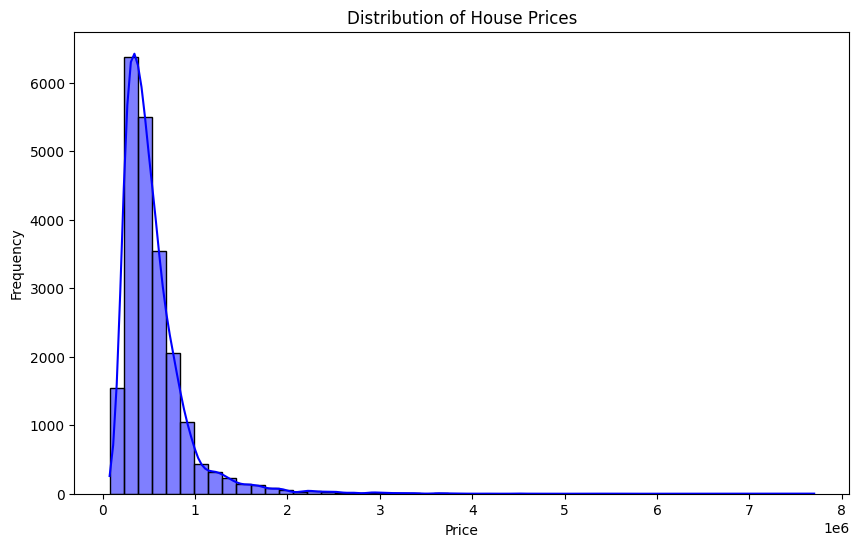

In [58]:
# 1. Distribution of House Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

> Helps understand whether price distribution is normal or skewed.

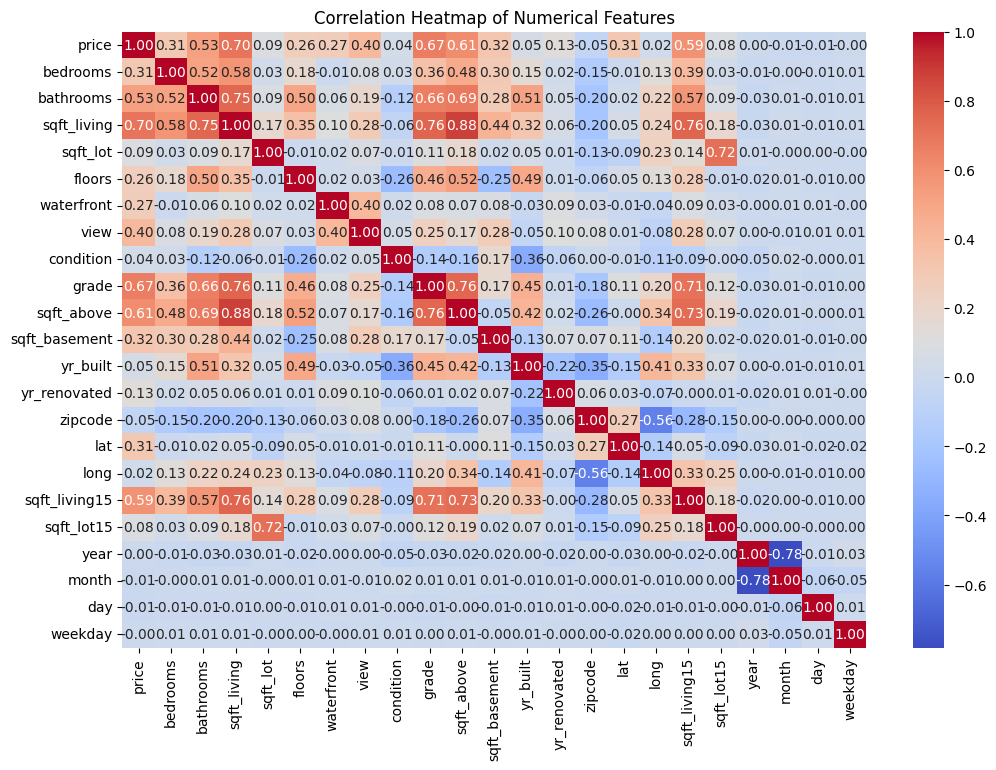

In [59]:
# 2. Correlation Heatmap for Numerical Features
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

>Helps identify which variables strongly influence price.

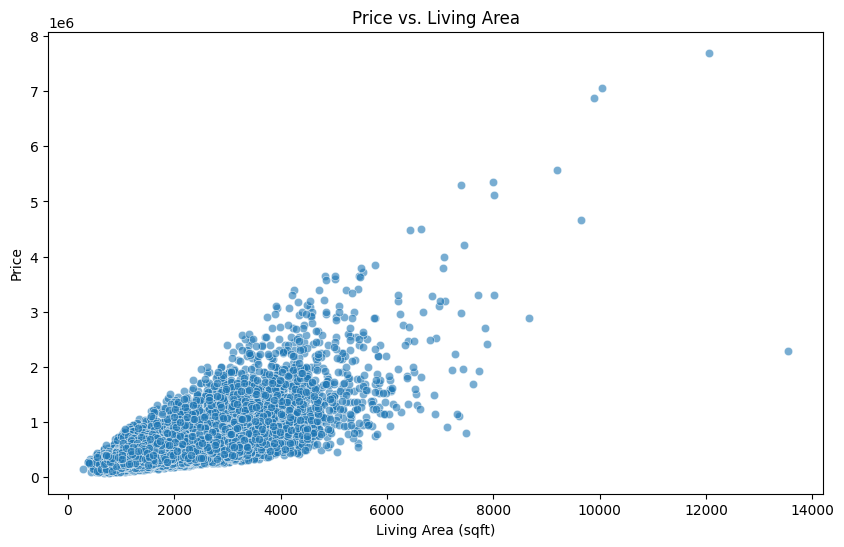

In [60]:
# 3. Scatter Plot: Price vs. Living Area (sqft_living)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.6)
plt.title('Price vs. Living Area')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()

> Shows how house size impacts price.

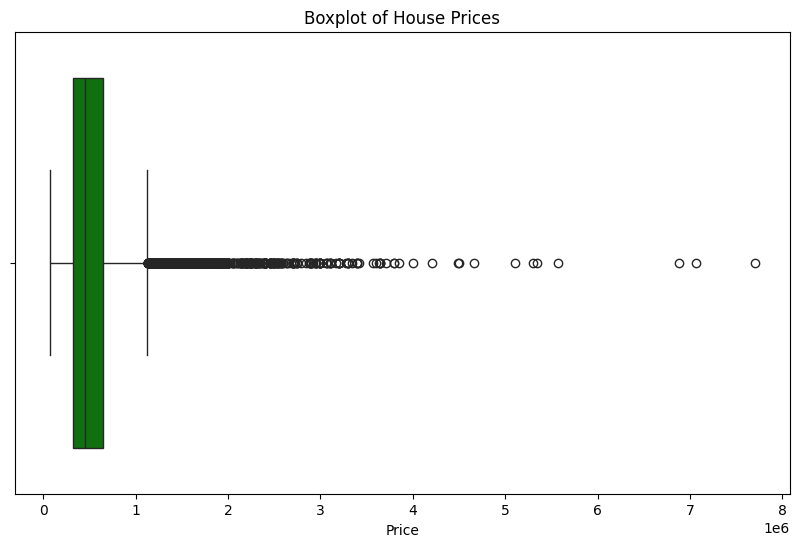

In [61]:
# 4. Boxplot to Detect Outliers in House Prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'], color='green')
plt.title('Boxplot of House Prices')
plt.xlabel('Price')
plt.show()

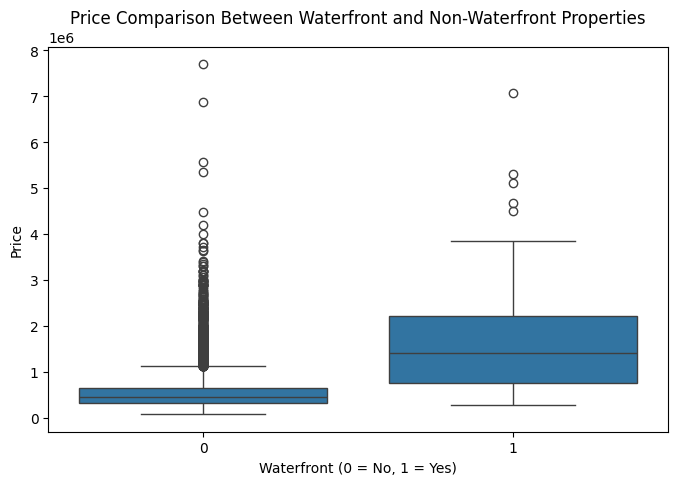

In [62]:
# Waterfront vs. price comparison
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['waterfront'], y=df['price'])
plt.title("Price Comparison Between Waterfront and Non-Waterfront Properties")
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.show()


### Step 5. Feature Engineering

In [63]:
# Print 5 rows of the dataset
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,weekday
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,98178,47.511200,-122.257004,1340,5650,2014,10,13,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1991,98125,47.721001,-122.319000,1690,7639,2014,12,9,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,98028,47.737900,-122.233002,2720,8062,2015,2,25,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,98136,47.520802,-122.392998,1360,5000,2014,12,9,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,98074,47.616798,-122.044998,1800,7503,2015,2,18,2


In [64]:
# Display the column names of the DataFrame
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day', 'weekday'],
      dtype='object')

In [65]:
# 1. id: Unique identifier for each house.
# 2. date: The date on which the house was sold.
# 3. price: The sale price of the house (in USD).
# 4. bedrooms : Number of bedrooms in the house.
# 5. bathrooms: Number of bathrooms in the house (can include half-baths).
# 6. sqft_living: Interior living space in square feet.
# 7. sqft_lot: Total lot size (land area) in square feet.
# 8. floors: Number of floors (levels) in the house.
# 9. waterfront: Indicates if the house has a waterfront (0 = no, 1 = yes).
# 10. view: Quality of the view from the house (0–4).
# 11. condition: Overall condition of the house (1–5).
# 12. grade: Overall grade of the house (based on King County grading system, 1–13).
# 13. sqft_above: Square footage of the house above ground level (no basement).
# 14. sqft_basement: Square footage of the basement.
# 15. yr_built: The year the house was originally built.
# 16. yr_renovated: The year the house was last renovated (0 if never renovated).
# 17. zipcode: The ZIP code where the house is located.
# 18. lat:  Latitude coordinate of the house’s location.
# 19. long:  Longitude coordinate of the house’s location.
# 20. sqft_living15: Average interior living space (in sqft) of homes in the same neighborhood (based on 15 nearest neighbors).
# 21. sqft_lot15: Average lot size (in sqft) of homes in the same neighborhood (based on 15 nearest neighbors).
# 22. year: Extracted sale year from the date column.
# 23. month: Extracted sale month from the date column (1–12).
# 24. day: Extracted sale day from the date column (1–31).
# 25. weekday: Extracted weekday from the date column (e.g., Monday=0, Sunday=6).

In [66]:
# Create a new feature: house_age
df['house_age'] = df['year'] - df['yr_built']

In [67]:
# Create a feature: price_per_sqft
df['price_per_sqft'] = df['price'] / df['sqft_living']


In [68]:
# Seeing Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21613 non-null  float32
 1   bedrooms        21613 non-null  int8   
 2   bathrooms       21613 non-null  float32
 3   sqft_living     21613 non-null  int16  
 4   sqft_lot        21613 non-null  int32  
 5   floors          21613 non-null  float32
 6   waterfront      21613 non-null  int8   
 7   view            21613 non-null  int8   
 8   condition       21613 non-null  int8   
 9   grade           21613 non-null  int8   
 10  sqft_above      21613 non-null  int16  
 11  sqft_basement   21613 non-null  int16  
 12  yr_built        21613 non-null  int16  
 13  yr_renovated    21613 non-null  int16  
 14  zipcode         21613 non-null  int32  
 15  lat             21613 non-null  float32
 16  long            21613 non-null  float32
 17  sqft_living15   21613 non-null 

### Step 6. Standard Scaling

In [69]:
# Select numerical features that need scaling
features_to_scale = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
                     'lat', 'long', 'sqft_living15', 'sqft_lot15']


# Initialize Standard Scaler
scaler = StandardScaler()

# Apply Standard Scaling
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [70]:
# Display the 5 row of dataset 
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,year,month,day,weekday,house_age,price_per_sqft
0,221900.0,3,1.00,-0.979835,-0.228321,1.0,0,0,3,7,...,-0.352572,-0.306106,-0.943355,-0.260715,2014,10,13,0,59,188.050842
1,538000.0,3,2.25,0.533634,-0.189885,2.0,0,0,3,7,...,1.161573,-0.746343,-0.432686,-0.187868,2014,12,9,1,63,209.338516
2,180000.0,2,1.00,-1.426254,-0.123298,1.0,0,0,3,6,...,1.283535,-0.135667,1.070140,-0.172375,2015,2,25,2,82,233.766235
3,604000.0,4,3.00,-0.130550,-0.244014,1.0,0,0,5,7,...,-0.283277,-1.271800,-0.914174,-0.284522,2014,12,9,1,49,308.163269
4,510000.0,3,2.00,-0.435422,-0.169653,1.0,0,0,3,8,...,0.409539,1.199348,-0.272190,-0.192849,2015,2,18,2,28,303.571442
